__Tutorial 4: Multiple linear regression and polynomial regression__
***
In this tutorial, we extend from the univariate case to the multivariate case (many input variables) to consider multiple linear regression. Our derivations for multiple linear regression are then extended to univariate and multivariate polynomial regression.

In the multivariate case, we have several input variables defined as $\boldsymbol{x} = [x_1, x_2, ... , x_n]$ and a vector of parameters $\boldsymbol{\theta} = [\theta_0, \theta_1, \theta_2 ... , \theta_n]$, such that for a single data point $y_i$:
$$
y_i = \boldsymbol{\theta}^T \boldsymbol{x_i} + \eta
$$
where $\eta$ is the noise component of the model. (Note: The first component of $\boldsymbol{\theta}$, $\theta_0$, is the parameter for our bias [intercept]). Then, for all $n$ measurements $\boldsymbol{y} = [y_1, y_2, ... , y_m]$, we have in full matrix notation:
$$
\boldsymbol{y} = \boldsymbol{X} \boldsymbol{\theta} + \boldsymbol{\eta}
$$
where $\boldsymbol{y}$ is $(m \times 1)$ for $m$ total measurements, $\boldsymbol{X}$ is $(m \times n)$ for $n$ input variables, and $\boldsymbol{\theta}$ and $\boldsymbol{\eta}$ are both $(n \times 1)$. Each column of $\boldsymbol{X}$ is a vector of the values of each input variable for the corresponding component of $\boldsymbol{y}$.

In [22]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Figure Settings
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

# Plotting Functions

def evaluate_fits(order_list, mse_list):
  """ Compare the quality of multiple polynomial fits
  by plotting their MSE values.

  Args:
    order_list (list): list of the order of polynomials to be compared
    mse_list (list): list of the MSE values for the corresponding polynomial fit
  """
  fig, ax = plt.subplots()
  ax.bar(order_list, mse_list)
  ax.set(title='Comparing Polynomial Fits', xlabel='Polynomial order', ylabel='MSE')

def plot_fitted_polynomials(x, y, theta_hat):
  """ Plot polynomials of different orders

  Args:
    x (ndarray): input vector of shape (n_samples)
    y (ndarray): vector of measurements of shape (n_samples)
    theta_hat (dict): polynomial regression weights for different orders
  """

  x_grid = np.linspace(x.min() - .5, x.max() + .5)

  plt.figure()

  for order in range(0, max_order + 1):
    X_design = make_design_matrix(x_grid, order)
    plt.plot(x_grid, X_design @ theta_hat[order]);

  plt.ylabel('y')
  plt.xlabel('x')
  plt.plot(x, y, 'C0.');
  plt.legend([f'order {o}' for o in range(max_order + 1)], loc=1)
  plt.title('polynomial fits')
  plt.show()

We first generate some toy data using two input variables so that we can easily visualize our regression solution.

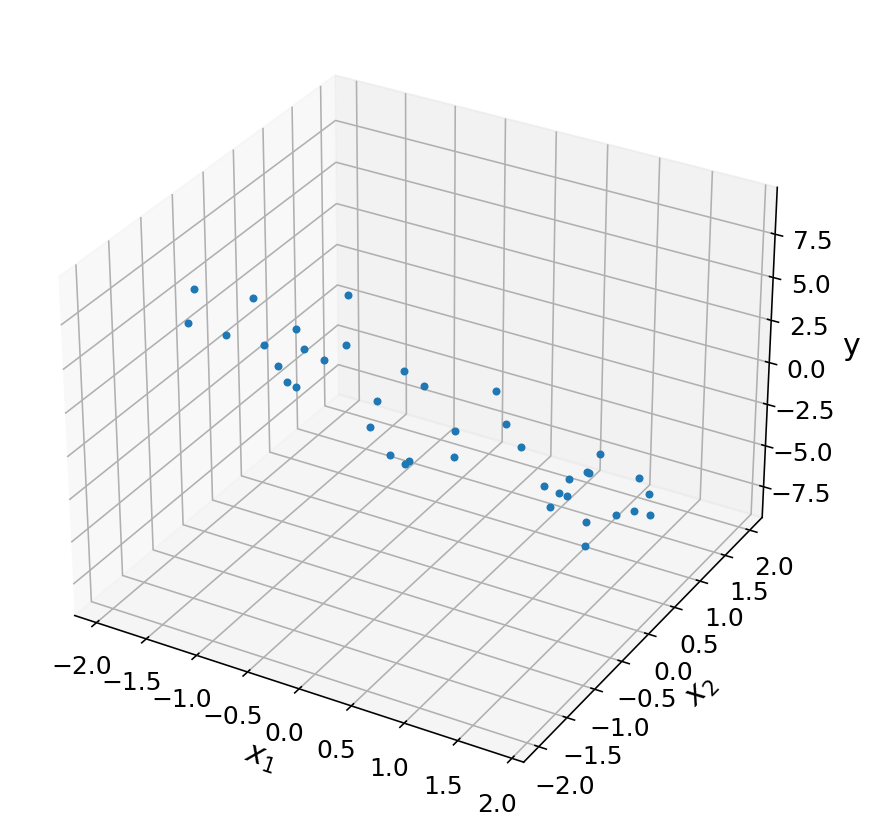

In [23]:
# Simulate some bivariate data for linear regression

# Set random seed for reproducibility
np.random.seed(1234)

# Set parameters
theta = [0, -2, -3]     # these are our true values for the theta vector
n_samples = 40

# Draw x and calculate y
n_regressors = len(theta)
x0 = np.ones((n_samples, 1))
x1 = np.random.uniform(-2, 2, (n_samples, 1))
x2 = np.random.uniform(-2, 2, (n_samples, 1))
X = np.hstack((x0, x1, x2))
noise = np.random.randn(n_samples)
y = X @ theta + noise


ax = plt.subplot(projection='3d')
ax.plot(X[:,1], X[:,2], y, '.')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='y'
)
plt.tight_layout()

In the multivariate case, when $\boldsymbol{y}$ is not in the column space of $\boldsymbol{X}$, we can define the error as
$$
\boldsymbol{\epsilon} = \boldsymbol{y} - \boldsymbol{X} \boldsymbol{\hat{\theta}}
$$
where $\boldsymbol{\hat{\theta}}$ is our estimate of the paramters of the model and $\boldsymbol{X} \boldsymbol{\hat{\theta}}$ is a linear combination of the columns of $\boldsymbol{X}$, and thus in the column space of $\boldsymbol{X}$. By the definition of $\boldsymbol{\epsilon}$, we know this vector must be perpendicular to the column space of $\boldsymbol{X}$. Therefore, $\boldsymbol{\epsilon}$ is in the nullspace of $\boldsymbol{X}^T$.

Given that $\boldsymbol{\epsilon}$ is in the nullspace of $\boldsymbol{X}^T$, we know
$$
\boldsymbol{X}^T \boldsymbol{\epsilon} = \boldsymbol{0}
$$
$$
\boldsymbol{X}^T (\boldsymbol{y} - \boldsymbol{X} \boldsymbol{\hat{\theta}}) = \boldsymbol{0}
$$
$$
\boldsymbol{X}^T \boldsymbol{X} \boldsymbol{\hat{\theta}} = \boldsymbol{X}^T \boldsymbol{y}
$$
$$
\boldsymbol{\hat{\theta}} = (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{y}
$$
This analytical solution for $\boldsymbol{\hat{\theta}}$ can be seen as an extension from the univariate case: we are finding the projection of $\boldsymbol{y}$ onto the column space of $\boldsymbol{X}$, which minimizes the length of the error vector. We implement a function for this analytical solution below and visualize the resulting regression plane.

The parameter vector is: [ 0.13861386 -2.09395731 -3.16370742]
MSE = 0.91


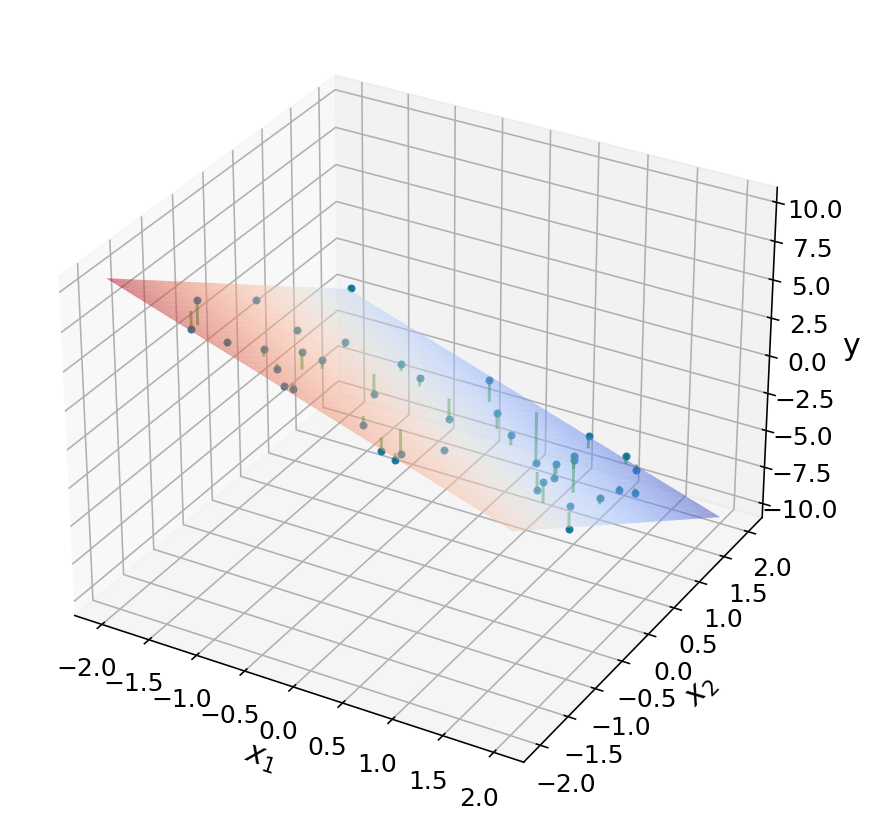

In [24]:
def ordinary_least_squares(X, y):
  """Ordinary least squares estimator for linear regression.

  Args:
    x (ndarray): design matrix of shape (n_samples, n_regressors)
    y (ndarray): vector of measurements of shape (n_samples)

  Returns:
    ndarray: estimated parameter values of shape (n_regressors)
  """

  # Compute theta_hat using OLS
  theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

  return theta_hat


theta_hat = ordinary_least_squares(X, y)
print(f"The parameter vector is: {theta_hat}")

# Compute predicted data
theta_hat = ordinary_least_squares(X, y)
y_hat = X @ theta_hat

# Compute MSE
print(f"MSE = {np.mean((y - y_hat)**2):.2f}")


# Visualize data and predicted plane

theta_hat = ordinary_least_squares(X, y)
xx, yy = np.mgrid[-2:2:50j, -2:2:50j]
y_hat_grid = np.array([xx.flatten(), yy.flatten()]).T @ theta_hat[1:]
y_hat_grid = y_hat_grid.reshape((50, 50))

ax = plt.subplot(projection='3d')
ax.plot(X[:, 1], X[:, 2], y, '.')
ax.plot_surface(xx, yy, y_hat_grid, linewidth=0, alpha=0.5, color='C1',
                cmap=plt.get_cmap('coolwarm'))

for i in range(len(X)):
  ax.plot((X[i, 1], X[i, 1]),
          (X[i, 2], X[i, 2]),
          (y[i], y_hat[i]),
          'g-', alpha=.5)

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='y'
)
plt.tight_layout()

We extend our analytical solution for multiple linear regression to consider the nonlinear case of polynomial regression using a new form for the matrix $\boldsymbol{X}$.

In the linear univariate case, $\boldsymbol{X} = [\boldsymbol{1}, \boldsymbol{x}]$. In the nonlinear univariate case, our form for $\boldsymbol{X}$ is:
$$
\boldsymbol{X} = [\boldsymbol{1}, \boldsymbol{x}^1, \boldsymbol{x}^2, ..., \boldsymbol{x}^k]
$$
where $\boldsymbol{x}$ is the column vector for our input, and $\boldsymbol{x}^k$ is a short-hand for saying all the components of $\boldsymbol{x}$ are raised to the $k$th power. $k$ is also the desired complexity (maximum polynomial order) of our nonlinear model. In the multivariate case, our form for $\boldsymbol{X}$ is:
$$
\boldsymbol{X} = [\boldsymbol{1}, \boldsymbol{x}_1^1, \boldsymbol{x}_2^1, ..., \boldsymbol{x}_n^1, \boldsymbol{x}_1^2, \boldsymbol{x}_2^2, ..., \boldsymbol{x}_n^2, ..., \boldsymbol{x}_1^k, \boldsymbol{x}_2^k, ..., \boldsymbol{x}_n^k,]
$$
Below we consider the case of univariate polynomial regression to create a model whose true nonlinear form is a 2nd-order polynomial.

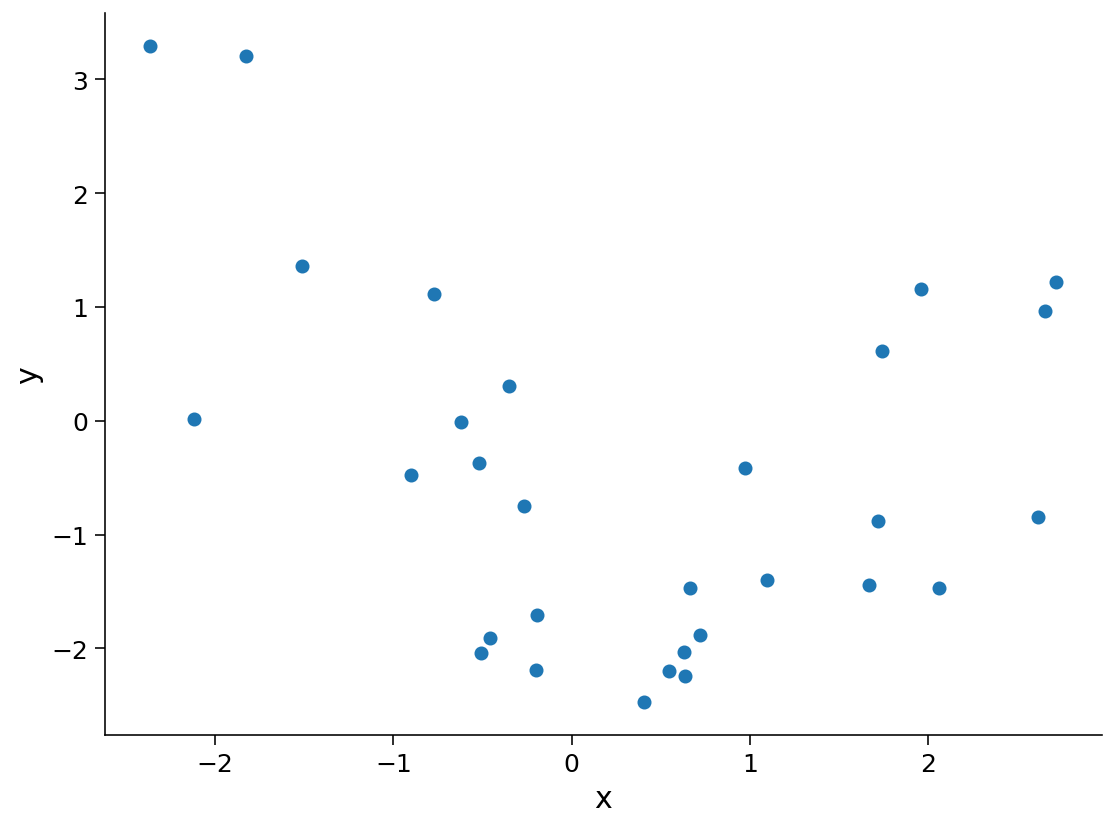

In [25]:
# Simulate some univariate data for polynomial regression
np.random.seed(121)
n_samples = 30
x = np.random.uniform(-2, 2.5, n_samples)  # inputs uniformly sampled from [-2, 2.5)
y =  x**2 - x - 2   # computing the outputs

output_noise = 1/8 * np.random.randn(n_samples)
y += output_noise  # adding some output noise

input_noise = 1/2 * np.random.randn(n_samples)
x += input_noise  # adding some input noise

fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');

Below we implement a function _make_design_matrix_ for creating our design matrix $\boldsymbol{X}$ for the the univariate data, where $\boldsymbol{X}$ is defined as above. We then solve implement another function _solve_poly_reg_ to compute all of the polynomial fits to the univariate data up to a desired complexity. These polynomial fits are then visualized.

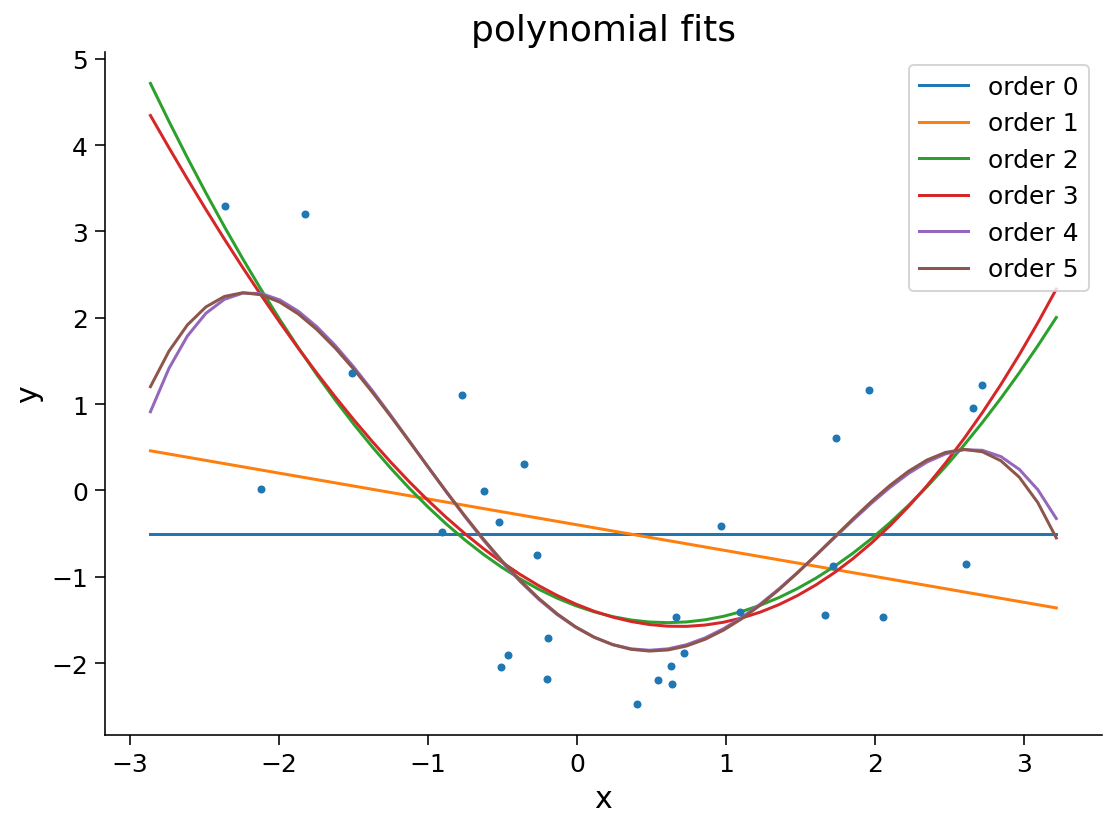

In [29]:
def make_design_matrix(x, order):
  """Create the design matrix of inputs for use in polynomial regression

  Args:
    x (ndarray): input vector of shape (n_samples)
    order (scalar): polynomial regression order

  Returns:
    ndarray: design matrix for polynomial regression of shape (samples, order+1)
  """

  # Broadcast to shape (n x 1) so dimensions work
  if x.ndim == 1:
    x = x[:, None]

  #if x has more than one feature, we don't want multiple columns of ones so we assign
  # x^0 here
  design_matrix = np.ones((x.shape[0], 1))

  # Loop through rest of degrees and stack columns (hint: np.hstack)
  for degree in range(1, order + 1):
      design_matrix = np.hstack((design_matrix, x**degree))

  return design_matrix

def solve_poly_reg(x, y, max_order):
  """Fit a polynomial regression model for each order 0 through max_order.

  Args:
    x (ndarray): input vector of shape (n_samples)
    y (ndarray): vector of measurements of shape (n_samples)
    max_order (scalar): max order for polynomial fits

  Returns:
    dict: fitted weights for each polynomial model (dict key is order)
  """

  # Create a dictionary with polynomial order as keys,
  # and np array of theta_hat (weights) as the values
  theta_hats = {}

  # Loop over polynomial orders from 0 through max_order
  for order in range(max_order + 1):

    # Create design matrix
    X_design = make_design_matrix(x, order)

    # Fit polynomial model
    this_theta = ordinary_least_squares(X_design, y)

    theta_hats[order] = this_theta

  return theta_hats

max_order = 5
theta_hats = solve_poly_reg(x, y, max_order)

# Visualize
plot_fitted_polynomials(x, y, theta_hats)

Lastly, we compute the mean-squared error for each of the polynomial fits and see that error decreases with increasing complexity. However, since we know that the true form of the data is a second-order polynomial, it is clear that models of higher complexity are overfitting to the data and capturing the effects of noise rather than the data's underlying structure.

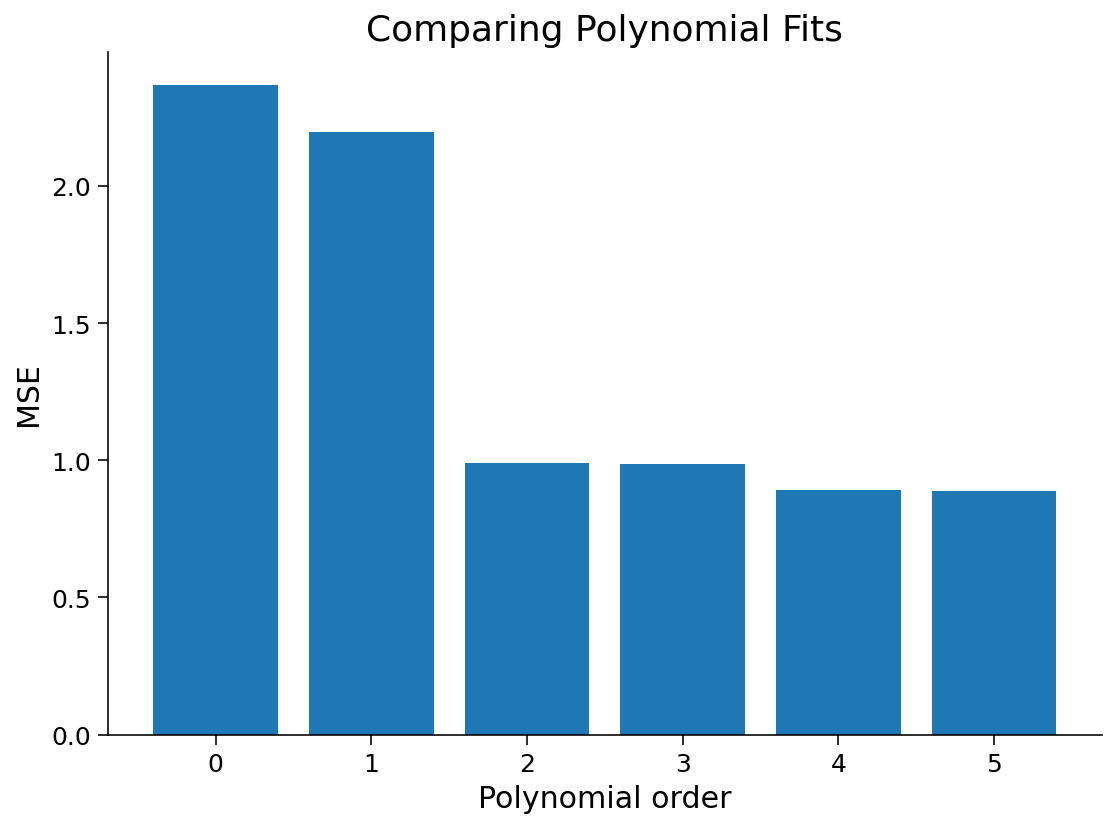

In [28]:
# Compare the MSEs for different polynomial orders using a bar plot
mse_list = []
order_list = list(range(max_order + 1))

for order in order_list:

  X_design = make_design_matrix(x, order)

  # Get prediction for the polynomial regression model of this order
  y_hat = X_design @ theta_hats[order]

  # Compute the residuals
  residuals = y - y_hat

  # Compute the MSE
  mse = np.mean(residuals**2)

  mse_list.append(mse)


# Visualize MSE of fits
evaluate_fits(order_list, mse_list)